In [2]:
%pip install tqdm

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.6 kB 330.3 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 335.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Files already downloaded and verified
Files already downloaded and verified


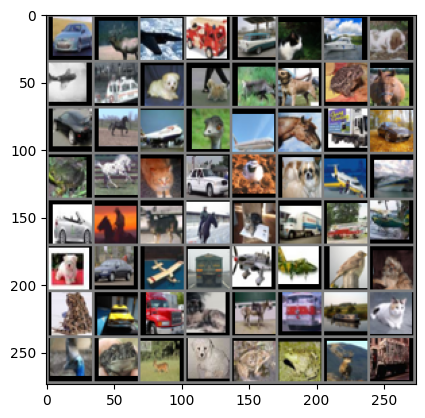

In [4]:
# Import essential libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from model import CustomCNN  # Custom CNN architecture
from torchvision import models
from torch.utils.data import DataLoader
from tqdm import tqdm  # For progress bars during training

# Define transformation with data augmentation for training
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Define transformation for test data (only normalization)
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Display a sample batch
import matplotlib.pyplot as plt
import numpy as np

# Function to show images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Use the built-in next() function

# Show images
imshow(torchvision.utils.make_grid(images))


# Step 2: Define the Custom CNN Model and Training Function

In [5]:
# Load the Custom CNN Model from model.py or define inline for quick prototyping
model = CustomCNN()  # Instantiate the CNN model
criterion = nn.CrossEntropyLoss()  # Cross-Entropy Loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training function
def train_model(model, epochs=10):
    model.train()  # Set model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in tqdm(trainloader):
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            
            running_loss += loss.item()
        
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(trainloader):.4f}")
    
    print("Training completed.")
    # Save the model
    torch.save(model.state_dict(), 'cnn_cifar10.pth')
    print("Model saved as cnn_cifar10.pth")

# Train the model
train_model(model, epochs=10)


100%|██████████| 782/782 [01:36<00:00,  8.13it/s]


Epoch [1/10], Loss: 1.5035


100%|██████████| 782/782 [01:22<00:00,  9.47it/s]


Epoch [2/10], Loss: 1.1368


100%|██████████| 782/782 [01:20<00:00,  9.75it/s]


Epoch [3/10], Loss: 0.9998


100%|██████████| 782/782 [01:39<00:00,  7.86it/s]


Epoch [4/10], Loss: 0.9186


100%|██████████| 782/782 [01:43<00:00,  7.52it/s]


Epoch [5/10], Loss: 0.8481


100%|██████████| 782/782 [01:44<00:00,  7.51it/s]


Epoch [6/10], Loss: 0.8042


100%|██████████| 782/782 [01:46<00:00,  7.35it/s]


Epoch [7/10], Loss: 0.7704


100%|██████████| 782/782 [01:38<00:00,  7.90it/s]


Epoch [8/10], Loss: 0.7396


100%|██████████| 782/782 [02:05<00:00,  6.24it/s]


Epoch [9/10], Loss: 0.7139


100%|██████████| 782/782 [01:33<00:00,  8.35it/s]

Epoch [10/10], Loss: 0.6914
Training completed.
Model saved as cnn_cifar10.pth


# Step 3: Load and Evaluate the Trained Model

In [6]:
# Load the saved model
model = CustomCNN()
model.load_state_dict(torch.load('cnn_cifar10.pth'))
model.eval()  # Set model to evaluation mode

# Function to evaluate the model
def evaluate_model(model):
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradients for evaluation
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Predicted class
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the CIFAR-10 test set: {accuracy:.2f}%')

# Evaluate the model
evaluate_model(model)


C:\Users\LuisValencia\AppData\Local\Temp\ipykernel_25772\1920305114.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('cnn_cifar10.pth'))


Accuracy of the model on the CIFAR-10 test set: 76.09%


# Step 4: Fine-Tune a Pre-Trained ResNet Model (Optional)

In [7]:
# Load pre-trained ResNet-18 model
resnet_model = models.resnet18(pretrained=True)

# Modify final layer to match CIFAR-10's 10 classes
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 10)

# Freeze all layers except the final fully connected layer
for param in resnet_model.parameters():
    param.requires_grad = False
for param in resnet_model.fc.parameters():
    param.requires_grad = True

# Use the same loss function and optimizer with a lower learning rate
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.fc.parameters(), lr=0.0001)

# Fine-tuning function
def fine_tune_model(model, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in tqdm(trainloader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(trainloader):.4f}")

    print("Fine-tuning completed.")
    # Save the fine-tuned model
    torch.save(model.state_dict(), 'resnet_cifar10.pth')
    print("Fine-tuned ResNet model saved as resnet_cifar10.pth")

# Fine-tune the ResNet model
fine_tune_model(resnet_model, epochs=10)

# Evaluate the fine-tuned model
evaluate_model(resnet_model)


c:\mmlbook\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\mmlbook\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 782/782 [00:57<00:00, 13.72it/s]


Epoch [1/10], Loss: 2.1476


100%|██████████| 782/782 [01:07<00:00, 11.67it/s]


Epoch [2/10], Loss: 1.8668


100%|██████████| 782/782 [00:57<00:00, 13.52it/s]


Epoch [3/10], Loss: 1.7906


100%|██████████| 782/782 [00:52<00:00, 14.93it/s]


Epoch [4/10], Loss: 1.7541


100%|██████████| 782/782 [00:53<00:00, 14.69it/s]


Epoch [5/10], Loss: 1.7346


100%|██████████| 782/782 [00:52<00:00, 14.78it/s]


Epoch [6/10], Loss: 1.7182


100%|██████████| 782/782 [00:53<00:00, 14.51it/s]


Epoch [7/10], Loss: 1.7062


100%|██████████| 782/782 [00:53<00:00, 14.67it/s]


Epoch [8/10], Loss: 1.6942


100%|██████████| 782/782 [00:53<00:00, 14.58it/s]


Epoch [9/10], Loss: 1.6888


100%|██████████| 782/782 [00:53<00:00, 14.74it/s]


Epoch [10/10], Loss: 1.6808
Fine-tuning completed.
Fine-tuned ResNet model saved as resnet_cifar10.pth
Accuracy of the model on the CIFAR-10 test set: 41.51%
